<a href="https://colab.research.google.com/github/TienLungSun/PyTorch-deep-learning/blob/main/2.1.%20MLP%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


# Read excel data file

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 0. Machine learning - Winequality-red.xlsx to 0. Machine learning - Winequality-red.xlsx


In [4]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

0. Machine learning - Winequality-red.xlsx


In [5]:
import pandas as pd
df=pd.read_excel(fname)

In [6]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
dfX = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
dfY = df[['quality']]

In [10]:
#convert data to numpy array
numpyX = np.array(dfX.values)
numpyY = np.array(dfY.values)
print(numpyX.shape, numpyY.shape)

(1599, 11) (1599, 1)


# In the future, we need to normalize x, y

# Split input data to train and test data

In [11]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(1279, 11) (320, 11) (1279, 1) (320, 1)


# Build NN

In [13]:
import torch.nn as nn

In [14]:
MyNet = nn.Sequential(
    nn.Linear(11, 56),
    nn.Sigmoid(),
    nn.Linear(56, 56),
    nn.Sigmoid(),
    nn.Linear(56, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=11, out_features=56, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=56, out_features=56, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=56, out_features=1, bias=True)
)


In [15]:
loss_func = torch.nn.MSELoss()

In [16]:
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.00003)

# Generate mini-batches of training data

In [17]:
import torch.utils.data as Data

In [18]:
#convert data format from numpy array to tensor
tensorX = torch.FloatTensor(trainX).to(device)
tensorY = torch.FloatTensor(trainY).to(device)

In [19]:
torch_dataset = Data.TensorDataset(tensorX, tensorY)

In [20]:
loader = Data.DataLoader(
    dataset=torch_dataset,  
    batch_size=500,      
    shuffle=True,       
    num_workers=0,  # subprocesses for loading data
)

In [21]:
# test mini-batch
for (batchX, batchY) in loader:
    break
print(batchX.shape, batchY.shape)

torch.Size([500, 11]) torch.Size([500, 1])


# Run training one time

In [22]:
batchY_hat  = MyNet(batchX)
loss = loss_func(batchY , batchY_hat)
print(float(loss))
optimizer.zero_grad()
loss.backward()
optimizer.step()

37.90913391113281


# Run training-test one time

In [23]:
lossLst = []
for epoch in range(1, 1000):
  if(epoch% 200 == 0):
      print(epoch, end=",")
  for (batchX, batchY) in loader:
    batchY_hat = MyNet(batchX)
    loss = loss_func(batchY_hat, batchY)
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

200,400,600,800,

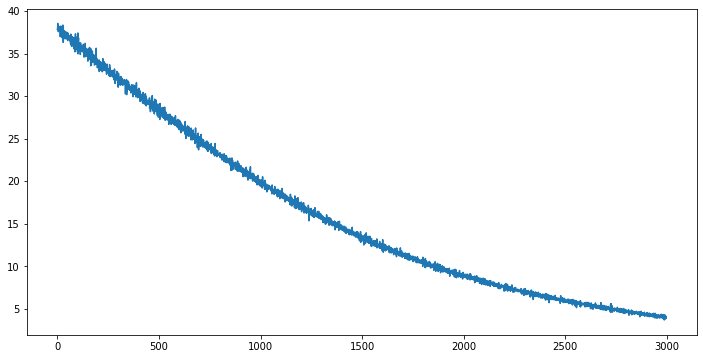

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(lossLst)
plt.show()

In [25]:
# Test to check generalized prediction performance
tensorX = torch.FloatTensor(testX).to(device)
tensorY = torch.FloatTensor(testY).to(device)
tensorY_hat = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("%.2f" % (float(loss)), end = ", ")

3.73, 

# Run training-test 20 times

In [26]:
train_lossLst = []
test_lossLst = []
for i in range(1, 21):
  print("\nTrain-test ", i, end= " ")
  trainX, testX, trainY, testY = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
  tensorX = torch.FloatTensor(trainX).to(device)
  tensorY = torch.FloatTensor(trainY).to(device)
  torch_dataset = Data.TensorDataset(tensorX, tensorY)
  loader = Data.DataLoader(
      dataset=torch_dataset,  
      batch_size=500,      
      shuffle=True,       
      num_workers=0,    # subprocesses for loading data
  )

  # initialize NN weights
  for name, param in MyNet.named_parameters():
    if(param.requires_grad):
      torch.nn.init.normal_(param, mean=0.0, std=0.02)
  loss_func = torch.nn.MSELoss()
  optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.0003)

  # train NN 
  print("epoch", end=": ")
  epoch_lossLst=[]
  for epoch in range(1, 700):
    if(epoch%100 == 0):
      print(epoch, end=",")
    for (batchX, batchY) in loader:
      batchY_hat = MyNet(batchX)
      loss = loss_func(batchY_hat, batchY)
      epoch_lossLst.append(float(loss))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  train_lossLst.append(epoch_lossLst) 

  tensorX = torch.FloatTensor(testX).to(device)
  tensorY = torch.FloatTensor(testY).to(device)
  tensorY_hat = MyNet(tensorX)
  loss = loss_func(tensorY, tensorY_hat)
  test_lossLst.append(float(loss))


Train-test  1 epoch: 100,200,300,400,500,600,
Train-test  2 epoch: 100,200,300,400,500,600,
Train-test  3 epoch: 100,200,300,400,500,600,
Train-test  4 epoch: 100,200,300,400,500,600,
Train-test  5 epoch: 100,200,300,400,500,600,
Train-test  6 epoch: 100,200,300,400,500,600,
Train-test  7 epoch: 100,200,300,400,500,600,
Train-test  8 epoch: 100,200,300,400,500,600,
Train-test  9 epoch: 100,200,300,400,500,600,
Train-test  10 epoch: 100,200,300,400,500,600,
Train-test  11 epoch: 100,200,300,400,500,600,
Train-test  12 epoch: 100,200,300,400,500,600,
Train-test  13 epoch: 100,200,300,400,500,600,
Train-test  14 epoch: 100,200,300,400,500,600,
Train-test  15 epoch: 100,200,300,400,500,600,
Train-test  16 epoch: 100,200,300,400,500,600,
Train-test  17 epoch: 100,200,300,400,500,600,
Train-test  18 epoch: 100,200,300,400,500,600,
Train-test  19 epoch: 100,200,300,400,500,600,
Train-test  20 epoch: 100,200,300,400,500,600,

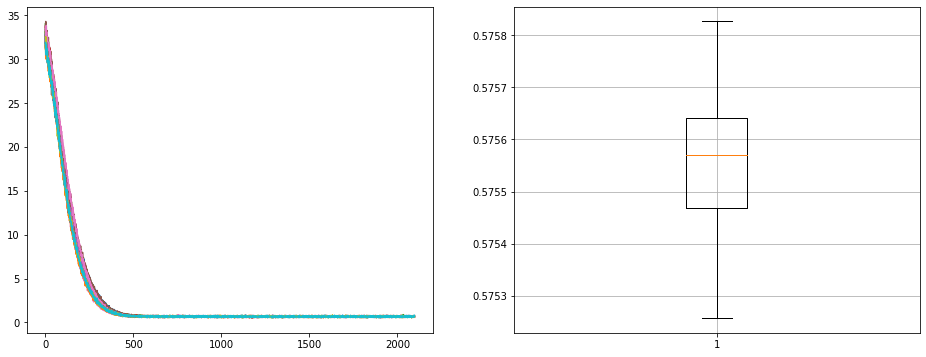

In [27]:
#take a look at the train loss plot and box plot of test lost
fig=plt.figure(figsize=(16, 6))
fig.add_subplot(1, 2, 1) #1 row, 2 cols
for lst in train_lossLst:
  plt.plot(lst)
fig.add_subplot(1, 2, 2) 
plt.boxplot(test_lossLst)
plt.grid()
plt.show()